## 0 環境構築

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
np.set_printoptions(precision=8)
np.random.seed(123)

In [2]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 4.1MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=da88aed13a150ce4e4b01d67aa1bf22c64e1b545e14a7c5e0c90b644b0146635
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [3]:
import japanize_matplotlib
import matplotlib as mpl
font = mpl.rcParams['font.family']
sns.set(context='notebook', style='whitegrid', font=font)

## 1 国内感染者数の推移

In [4]:
!wget https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv

--2021-06-29 03:52:28--  https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv
Resolving www3.nhk.or.jp (www3.nhk.or.jp)... 23.200.152.195
Connecting to www3.nhk.or.jp (www3.nhk.or.jp)|23.200.152.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15113 (15K) [application/x-excel]
Saving to: ‘nhk_news_covid19_domestic_daily_data.csv’

nhk_news_covid19_do 100%[===================>]  14.76K  --.-KB/s    in 0s      

2021-06-29 03:52:29 (173 MB/s) - ‘nhk_news_covid19_domestic_daily_data.csv’ saved [15113/15113]



In [5]:
# df_nhk = pd.read_csv("https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
# df_nhk.head()

In [6]:
df_nhk = pd.read_csv("nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
df_nhk.head()

,国内の感染者数_1日ごとの発表数,国内の感染者数_累計,国内の死者数_1日ごとの発表数,国内の死者数_累計
日付,,,,
2020-01-16,1,1,0,0
2020-01-17,0,1,0,0
2020-01-18,0,1,0,0
2020-01-19,0,1,0,0
2020-01-20,0,1,0,0


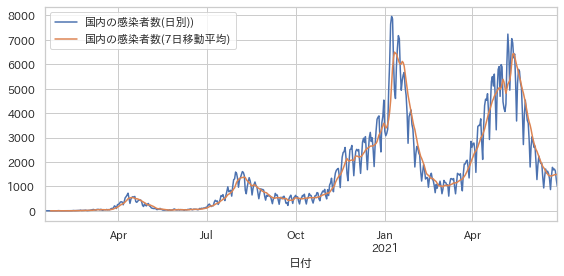

In [7]:
df_nhk['国内の感染者数_1日ごとの発表数'].plot(figsize=(8, 4), grid=True, legend=True, label="国内の感染者数(日別))")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label="国内の感染者数(7日移動平均)")
plt.tight_layout()

## 2 ダウンロード

### (1) rakuten-all-2020_2021

In [8]:
FILE_ID = "1-8QbsBoYuGT_uY9n3MsRWtLE95eaMLyO"
FILE_NAME = "rakuten-all-2020-2021.tsv.zip"
# !curl -sc ./cookie "https://drive.google.com/uc?export=download&id={FILE_ID}"
# CODE = !awk '/_warning_/ {print $NF}' ./cookie
# !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={CODE[0]}&id={FILE_ID}" -o {FILE_NAME}

!curl -L "https://docs.google.com/uc?export=download&id={FILE_ID}" > {FILE_NAME}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    161      0 --:--:--  0:00:02 --:--:--   161
100 14.8M    0 14.8M    0     0  4338k      0 --:--:--  0:00:03 --:--:-- 38.1M


### (2) rakuten-all-2018-2019

In [9]:
FILE_ID = "1-6dvK09H5rCUdpcH29qn_E4ABRnwEZPu"
FILE_NAME = "rakuten-all-2018-2019.tsv.zip"
# !curl -sc ./cookie "https://drive.google.com/uc?export=download&id={FILE_ID}"
# CODE = !awk '/_warning_/ {print $NF}' ./cookie
# !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={CODE[0]}&id={FILE_ID}" -o {FILE_NAME}

!curl -L "https://docs.google.com/uc?export=download&id={FILE_ID}" > {FILE_NAME}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    194      0 --:--:--  0:00:01 --:--:--   194
100 21.7M    0 21.7M    0     0  7254k      0 --:--:--  0:00:03 --:--:-- 48.4M


In [10]:
!ls

nhk_news_covid19_domestic_daily_data.csv  rakuten-all-2020-2021.tsv.zip
rakuten-all-2018-2019.tsv.zip		  sample_data


In [11]:
!unzip rakuten-all-2020-2021.tsv.zip
!unzip rakuten-all-2018-2019.tsv.zip
!wc -l *.tsv

Archive:  rakuten-all-2020-2021.tsv.zip
  inflating: rakuten-all-2020_2021.tsv  
Archive:  rakuten-all-2018-2019.tsv.zip
  inflating: rakuten-all-2018-2019.tsv  
   186234 rakuten-all-2018-2019.tsv
   119936 rakuten-all-2020_2021.tsv
   306170 total


In [12]:
!head -n +4 rakuten-all-2020_2021.tsv

カテゴリー	エリア	施設番号	施設名	コメント	総合	サービス	立地	部屋	設備・アメニティ	風呂	食事	旅行の目的	同伴者	宿泊年月	投稿者	年代	性別	投稿回数
A_レジャー	01_登別	104803	伊達ビジネスホテル　キャッスル	食事が良かったです。	4	4	3	3	3	3	3	レジャー	一人	2020-08-04	投稿者	na	na	na
A_レジャー	01_登別	104803	伊達ビジネスホテル　キャッスル	宿泊しました。サービス面がよかったです！	4	5	5	4	5	-	-	レジャー	家族	2020-08-01	投稿者	na	na	na
A_レジャー	01_登別	104803	伊達ビジネスホテル　キャッスル	前日にバス・トイレ付きに変更してもらいました。丁寧な対応で良かったです。	3	3	3	2	3	-	2	その他	一人	2020-03-28	投稿者	na	na	na


In [13]:
df_all = pd.read_csv("rakuten-all-2020_2021.tsv", sep='\t', quoting=3, escapechar='\\')
df_all['宿泊年月'] = pd.to_datetime(df_all['宿泊年月'], format='%Y-%m-%d')
df_all['index'] = df_all.index
df_all.set_index('宿泊年月', inplace=True)
df_all = df_all.tz_localize('Asia/Tokyo')
print(df_all.shape)
df_all.head()

(119935, 19)


,カテゴリー,エリア,施設番号,施設名,コメント,総合,サービス,立地,部屋,設備・アメニティ,風呂,食事,旅行の目的,同伴者,投稿者,年代,性別,投稿回数,index
宿泊年月,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,食事が良かったです。,4,4,3,3,3,3,3,レジャー,一人,投稿者,na,na,na,0
2020-08-01 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,宿泊しました。サービス面がよかったです！,4,5,5,4,5,-,-,レジャー,家族,投稿者,na,na,na,1
2020-03-28 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,前日にバス・トイレ付きに変更してもらいました。丁寧な対応で良かったです。,3,3,3,2,3,-,2,その他,一人,投稿者,na,na,na,2
2020-03-28 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,洗面台付きだったので良かったです。ただ、お部屋がお風呂の上だったのか床暖房が入っているような...,3,3,3,2,3,2,2,その他,家族,投稿者,na,na,na,3
2020-09-21 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,9月21日に利用しました。お料理、とても量が多いです。古いながらも、お部屋綺麗にしていますが...,3,4,3,3,3,1,3,レジャー,家族,投稿者,na,na,na,4


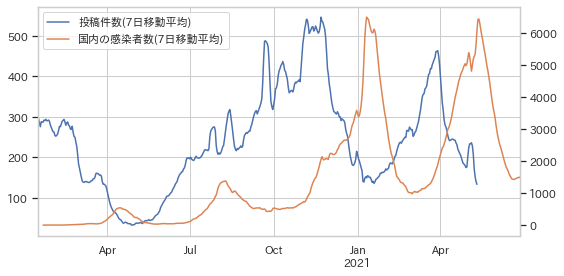

In [14]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

df_all['index'].resample('D').count().rolling(7).mean().plot(ax=ax1, grid=True, c='C0', legend=True, label="投稿件数(7日移動平均)")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(ax=ax2, grid=False, c='C1', legend=False, label="国内の感染者数(7日移動平均)")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, facecolor='white', loc='upper left')
ax1.set_xlabel("")

plt.tight_layout()

## 3 クチコミ "rakuten-all-2020_2021" のテキスト分析

### 3.1 MeCab + neologd インストール

In [15]:
!apt install mecab libmecab-dev file
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n
!cp /etc/mecabrc /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/mecabrc
!pip install fugashi ipadic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1 libmecab2 mecab-jumandic mecab-jumandic-utf8
  mecab-utils
The following NEW packages will be installed:
  file libmagic-mgc libmagic1 libmecab-dev libmecab2 mecab mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 9 newly installed, 0 to remove and 39 not upgraded.
Need to get 17.1 MB of archives.
After this operation, 227 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.4 [22.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:5 http://archive.ubuntu.co

In [16]:
import os, subprocess, ipadic
cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path_neologd = (subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True).communicate()[0]).decode('utf-8').strip()
ipadic.DICDIR = path_neologd
ipadic.MECAB_ARGS = '-r "{}" -d "{}"'.format(os.path.join(ipadic.DICDIR, 'mecabrc'), ipadic.DICDIR)
print(ipadic.MECAB_ARGS)

-r "/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/mecabrc" -d "/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd"


In [17]:
from fugashi import GenericTagger
import ipadic

# m = GenericTagger(ipadic.MECAB_ARGS + " " + "-Owakati")
# m = GenericTagger(ipadic.MECAB_ARGS + " " + '--node-format="%pS%f[6]\\s" --eos-format="\\n" --unk-format="%m"')
m = GenericTagger(ipadic.MECAB_ARGS)

text = "私はフック船長が好きです。親がコロナになる。"

for word in m.parseToNodeList(text):
    print(word.surface, word.feature)

私 ('名詞', '代名詞', '一般', '*', '*', '*', '私', 'ワタシ', 'ワタシ')
は ('助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ')
フック船長 ('名詞', '固有名詞', '人名', '一般', '*', '*', 'フック船長', 'フックセンチョウ', 'フックセンチョー')
が ('助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ')
好き ('名詞', '形容動詞語幹', '*', '*', '*', '*', '好き', 'スキ', 'スキ')
です ('助動詞', '*', '*', '*', '特殊・デス', '基本形', 'です', 'デス', 'デス')
。 ('記号', '句点', '*', '*', '*', '*', '。', '。', '。')
親 ('名詞', '一般', '*', '*', '*', '*', '親', 'オヤ', 'オヤ')
が ('助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ')
コロナ ('名詞', '一般', '*', '*', '*', '*', 'コロナ', 'コロナ', 'コロナ')
に ('助詞', '格助詞', '一般', '*', '*', '*', 'に', 'ニ', 'ニ')
なる ('動詞', '自立', '*', '*', '五段・ラ行', '基本形', 'なる', 'ナル', 'ナル')
。 ('記号', '句点', '*', '*', '*', '*', '。', '。', '。')


In [18]:
m = GenericTagger(ipadic.MECAB_ARGS)

# def mecab_tokenizer(text):
#     return m.parse(text)

def mecab_tokenizer(text):
    ret = []
    for word in m.parseToNodeList(text):
        # 品詞を選択する
        if word.feature[0] not in ['名詞','動詞','形容詞','副詞','形容動詞','未知語']:
            continue
        # 不要語を除去する
        if word.feature[0] == '名詞' and word.feature[1] == '非自立':  # 'よう'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '非自立':  # 'いる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '接尾':    # 'られる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '自立' and word.feature[6] in ['ある','する']:
            continue
        ret.append(word.feature[6])
    return ' '.join(ret)

In [19]:
" ".join(df_all['コメント'][0:100].map(mecab_tokenizer))

'食事 良い 宿泊 サービス 面 よい 前日 バス トイレ 付き 変更 丁寧 対応 良い 洗面 台 付き 良い お部屋 風呂 床暖房 入る 暖かい さ 少し 室温 暑い 朝食 少し 期待外れ 9月21日 利用 料理 とても 量 多い 古い お部屋 綺麗 部屋 壁 ゲジゲジ いる 気持ち 悪い 風呂 狭い シャワー 壊れる 出る 静か 立地 温泉 リフレッシュ できる 他 天婦羅 等 美味しい 頂く 朝 早め 御飯 ひと言 若い オバアちゃん もっと 接客 改める いい 食事 プラン 選べる 今回 ジンギスカン 肉 野菜 ボリューム 満点 とても 美味しい 頂く 料理 風呂 大好き 宿 遠い また 行く スタッフ 方々 素朴 好き 値段 安い 関わる 必要 揃う 快適 過ごせる 部屋 トイレ ふろ 最高 今年 料理 味 濃い 思う 担当者 代わる 私 味覚 問題 しれる 一泊 ４ ０ ０ ０ ０ 円 代 宿 頻繁 利用 宿 素朴 さ 大好き 犬 泊まれる 稀有 宿 激 熱 内湯 気合い 入れる くー ふう * 我慢 入る 最高 時々 備え付け 板 使う 湯 まかす 北海道弁 炸裂 ２ 階 部屋 行く 解放 喫煙 スペース 前 通過 なる 必ず タバコ におい 嗅ぐ 残念 温泉 前 冷蔵庫 入る 還元水 ピッチャー ごと 部屋 持ち込む OK 良い サービス 思う 建物 古 め きちんと 掃除 感心 山 隠れ家 的 雰囲気 凄い 良い 過度 サービス 有馬線 これ 丁度 良い 思う 夕食 品数 多い 有馬線 モノ 上質 良い 特に 卵 見る ない 淡い 黄色 卵黄 感動 折角 檜 風呂 入る 熱す 技手 蛇口 到達 できる 水 水温 下げる かなう 部屋 自体 かなり 綺麗 快適 くつろぐ できる なかなか 遠い 行く 機会 作る 難しい 再訪 感じる 渓流釣り 利用 主人 女将 さん 人柄 良い cospa 最高 宿 利用 古い よく 清掃 満足 * スキー 利用 宿 ぽかぽか 身体 芯 温まる 夜 ぐっすり 眠れる 温泉 アトピー 大変 よく 効く 何より 素敵 主人 女将 さん 温かい 人柄 心遣い たくさん 心遣い 頂く 心 ぽかぽか 温まる 忘れる ない 思い出 残る 宿 なる 大変 お世話になりました cospa 重視 泊まる 思う 部屋 レイク・ビュー 日

In [20]:
df_all['mecab'] = df_all['コメント'].map(mecab_tokenizer)
df_all['length'] = df_all['mecab'].map(lambda x: x.split()).map(len)
print(df_all.shape)
df_all.head()

(119935, 21)


,カテゴリー,エリア,施設番号,施設名,コメント,総合,サービス,立地,部屋,設備・アメニティ,風呂,食事,旅行の目的,同伴者,投稿者,年代,性別,投稿回数,index,mecab,length
宿泊年月,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,食事が良かったです。,4,4,3,3,3,3,3,レジャー,一人,投稿者,na,na,na,0,食事 良い,2
2020-08-01 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,宿泊しました。サービス面がよかったです！,4,5,5,4,5,-,-,レジャー,家族,投稿者,na,na,na,1,宿泊 サービス 面 よい,4
2020-03-28 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,前日にバス・トイレ付きに変更してもらいました。丁寧な対応で良かったです。,3,3,3,2,3,-,2,その他,一人,投稿者,na,na,na,2,前日 バス トイレ 付き 変更 丁寧 対応 良い,8
2020-03-28 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,洗面台付きだったので良かったです。ただ、お部屋がお風呂の上だったのか床暖房が入っているような...,3,3,3,2,3,2,2,その他,家族,投稿者,na,na,na,3,洗面 台 付き 良い お部屋 風呂 床暖房 入る 暖かい さ 少し 室温 暑い 朝食 少し ...,16
2020-09-21 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,9月21日に利用しました。お料理、とても量が多いです。古いながらも、お部屋綺麗にしていますが...,3,4,3,3,3,1,3,レジャー,家族,投稿者,na,na,na,4,9月21日 利用 料理 とても 量 多い 古い お部屋 綺麗 部屋 壁 ゲジゲジ いる 気持...,20


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(max_df=0.5, min_df=1, max_features=500)
bag = count.fit_transform(df_all['mecab'].values)
feature_names = count.get_feature_names()
feature_names[0:10]

['1つ', '1人', '1階', '2人', 'bathtab', 'cospa', 'fi', 'to', 'wi', 'あと']

In [22]:
tf = bag.toarray().sum(axis=0)
for i in tf.argsort()[:-10:-1]:
    print(tf[i], "\t", count.get_feature_names()[i])

54709 	 部屋
52693 	 良い
46858 	 利用
44684 	 思う
40270 	 とても
36277 	 ホテル
29600 	 できる
29307 	 宿泊
29164 	 なる


In [23]:
df_count = pd.DataFrame(bag.toarray())
df_count.columns = feature_names
print(df_count.shape)
df_count.head()

(119935, 500)


,1つ,1人,1階,2人,bathtab,cospa,fi,to,wi,あと,あまり,あり,ありがたい,いい,いう,いく,いただく,いただける,いつも,いる,いろいろ,うるさい,うれしい,おいしい,おすすめ,お世話,お世話になりました,お安い,お湯,お茶,お部屋,お願い,かかる,かける,かなり,きちんと,きれい,くつろげる,ここ,こちら,...,近く,迷う,通り,連絡,遅い,過ごす,過ごせる,違う,遠い,選ぶ,選べる,選択,部分,部屋,配慮,金額,長い,開ける,離れる,雰囲気,電子レンジ,電話,電車,露天風呂,静か,非常,頂く,頂ける,頑張る,風呂,食べる,食事,飲み物,飲む,飲食店,館内,駐車場,驚く,高い,髪の毛
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


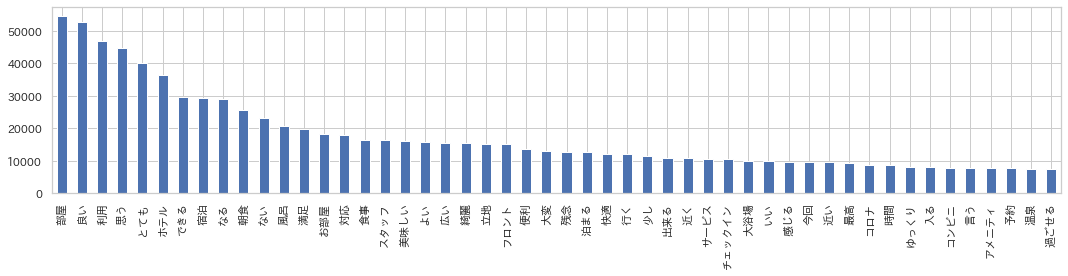

In [24]:
df_count.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(figsize=(15, 4), grid=True)
plt.tight_layout()

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf = tfidf_vectorizer.fit_transform(bag)

In [26]:
df_tfidf = pd.DataFrame(tfidf.toarray())
df_tfidf.columns = feature_names
print(df_tfidf.shape)
df_tfidf.head()

(119935, 500)


,1つ,1人,1階,2人,bathtab,cospa,fi,to,wi,あと,あまり,あり,ありがたい,いい,いう,いく,いただく,いただける,いつも,いる,いろいろ,うるさい,うれしい,おいしい,おすすめ,お世話,お世話になりました,お安い,お湯,お茶,お部屋,お願い,かかる,かける,かなり,きちんと,きれい,くつろげる,ここ,こちら,...,近く,迷う,通り,連絡,遅い,過ごす,過ごせる,違う,遠い,選ぶ,選べる,選択,部分,部屋,配慮,金額,長い,開ける,離れる,雰囲気,電子レンジ,電話,電車,露天風呂,静か,非常,頂く,頂ける,頑張る,風呂,食べる,食事,飲み物,飲む,飲食店,館内,駐車場,驚く,高い,髪の毛
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.830819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.261073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.246361,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197903,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2 可視化

#### Word Cloud

In [27]:
topic = bag.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

54709 	 部屋
52693 	 良い
46858 	 利用
44684 	 思う
40270 	 とても
36277 	 ホテル
29600 	 できる
29307 	 宿泊
29164 	 なる


In [28]:
topic = tfidf.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

7559.30618797112 	 良い
6696.312007249118 	 利用
6683.800662935113 	 部屋
5878.931143218778 	 とても
5245.86315238793 	 思う
4970.437579535336 	 ホテル
4358.103846354411 	 宿泊
4235.006044076024 	 できる
4110.7484696431975 	 朝食


In [29]:
font_path = !find / -name "*.ttf" 2> /dev/null | grep -s "ipaexg.ttf" | head -n 1
font_path

['/usr/local/lib/python3.7/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf']

良い,利用,部屋,とても,思う,ホテル,宿泊,できる,朝食,なる,満足,綺麗,風呂,よい,便利,ない,立地,対応,お部屋,美味しい


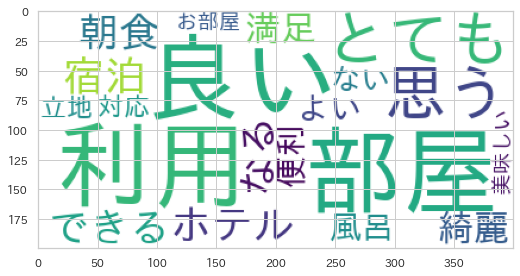

In [30]:
from wordcloud import WordCloud

fig = plt.figure(figsize=(8,4))
words = count.get_feature_names()
n_top_words = 20

long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
print(long_string)

wordcloud = WordCloud(font_path=font_path[0], background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
plt.imshow(wordcloud)

plt.tight_layout()

#### 対応分析

In [31]:
df_all[['index', 'カテゴリー', 'エリア']].head()

,index,カテゴリー,エリア
宿泊年月,,,
2020-08-04 00:00:00+09:00,0,A_レジャー,01_登別
2020-08-01 00:00:00+09:00,1,A_レジャー,01_登別
2020-03-28 00:00:00+09:00,2,A_レジャー,01_登別
2020-03-28 00:00:00+09:00,3,A_レジャー,01_登別
2020-09-21 00:00:00+09:00,4,A_レジャー,01_登別


In [32]:
df_merge = pd.merge(df_all[['index', 'カテゴリー', 'エリア']], df_count, left_on='index', how='inner', right_index=True)
print(df_merge.shape)
df_merge.head()

(119935, 503)


,index,カテゴリー,エリア,1つ,1人,1階,2人,bathtab,cospa,fi,to,wi,あと,あまり,あり,ありがたい,いい,いう,いく,いただく,いただける,いつも,いる,いろいろ,うるさい,うれしい,おいしい,おすすめ,お世話,お世話になりました,お安い,お湯,お茶,お部屋,お願い,かかる,かける,かなり,きちんと,きれい,...,近く,迷う,通り,連絡,遅い,過ごす,過ごせる,違う,遠い,選ぶ,選べる,選択,部分,部屋,配慮,金額,長い,開ける,離れる,雰囲気,電子レンジ,電話,電車,露天風呂,静か,非常,頂く,頂ける,頑張る,風呂,食べる,食事,飲み物,飲む,飲食店,館内,駐車場,驚く,高い,髪の毛
宿泊年月,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-04 00:00:00+09:00,0,A_レジャー,01_登別,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2020-08-01 00:00:00+09:00,1,A_レジャー,01_登別,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-28 00:00:00+09:00,2,A_レジャー,01_登別,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-28 00:00:00+09:00,3,A_レジャー,01_登別,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2020-09-21 00:00:00+09:00,4,A_レジャー,01_登別,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [33]:
df_period2 = df_merge.groupby(["エリア"]).sum()
df_period2.drop('index', axis=1, inplace=True)
df_period2.head()

,1つ,1人,1階,2人,bathtab,cospa,fi,to,wi,あと,あまり,あり,ありがたい,いい,いう,いく,いただく,いただける,いつも,いる,いろいろ,うるさい,うれしい,おいしい,おすすめ,お世話,お世話になりました,お安い,お湯,お茶,お部屋,お願い,かかる,かける,かなり,きちんと,きれい,くつろげる,ここ,こちら,...,近く,迷う,通り,連絡,遅い,過ごす,過ごせる,違う,遠い,選ぶ,選べる,選択,部分,部屋,配慮,金額,長い,開ける,離れる,雰囲気,電子レンジ,電話,電車,露天風呂,静か,非常,頂く,頂ける,頑張る,風呂,食べる,食事,飲み物,飲む,飲食店,館内,駐車場,驚く,高い,髪の毛
エリア,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01_登別,36,35,12,37,4,34,23,23,23,92,83,17,63,278,68,48,85,63,90,195,29,15,16,181,39,40,51,22,135,18,543,111,42,54,141,56,83,31,85,122,...,103,25,49,39,55,155,157,70,58,71,34,29,33,1416,57,20,38,55,37,68,2,63,5,436,63,126,99,62,59,1120,338,1299,33,46,8,97,90,40,106,28
02_草津,50,40,11,84,5,51,21,26,21,95,115,35,99,442,116,57,148,119,92,215,37,53,27,203,61,98,141,17,307,60,662,114,61,50,137,57,103,29,96,210,...,298,27,122,37,65,223,244,119,94,90,64,25,42,1610,48,42,41,50,102,157,9,74,4,413,132,135,145,92,62,1605,409,1572,50,73,17,196,184,72,131,23
03_箱根,148,162,33,245,10,148,68,103,68,290,356,77,246,1005,365,147,475,353,191,607,105,91,75,538,143,192,346,48,498,119,2576,317,177,155,407,162,268,94,224,639,...,424,101,226,134,166,822,709,264,108,253,187,120,123,5070,210,130,91,138,138,455,19,270,55,2353,351,392,384,279,180,3533,1111,4633,203,202,25,431,306,170,361,87
04_道後,49,36,35,55,17,111,33,36,33,104,99,52,124,470,118,63,216,127,211,178,60,49,58,272,107,113,117,28,142,26,826,175,73,47,165,75,174,36,120,207,...,398,54,79,47,98,338,317,98,62,112,86,57,27,2241,67,50,28,59,82,124,11,96,46,415,93,199,156,79,80,1221,425,1232,46,69,46,131,415,48,160,30
05_湯布院,36,34,8,52,3,34,21,24,21,76,67,5,44,297,84,43,146,75,45,132,33,20,14,187,56,67,138,13,169,34,704,85,36,42,106,21,63,47,65,135,...,114,28,98,32,31,275,242,53,30,64,15,16,23,1170,45,19,28,34,141,177,7,65,3,671,165,93,137,50,59,933,270,1145,40,69,6,39,82,51,83,17


In [34]:
!pip install mca

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6025 sha256=64874aeee4913607430bc738f2c770baf018dd3c29e355e64bfc29712d0c2126
  Stored in directory: /root/.cache/pip/wheels/01/fb/ff/19d72d65c8bb01d4af40c9c2ca20fd267d1969b3b5f8dd60d6
Successfully built mca


In [35]:
import mca
ncols = df_period2.shape[1]
mca_ben = mca.MCA(df_period2, ncols=ncols, benzecri=False)
mca_ben.fs_r(N=2)

array([[-4.29257915e-01,  9.32526841e-02],
       [-5.66614644e-01, -5.61733039e-01],
       [-5.03321390e-01,  1.62416201e-01],
       [-1.84072397e-01,  4.33172733e-02],
       [-5.89878754e-01,  1.22463179e-01],
       [ 1.21644975e-01, -4.78302488e-03],
       [ 1.65693338e-01, -1.28501954e-02],
       [ 1.67560793e-01, -5.66259076e-04],
       [ 1.42421521e-01, -4.58049756e-03],
       [ 1.28490356e-01, -7.24281177e-03]])

In [36]:
result_row = pd.DataFrame(mca_ben.fs_r(N=2))
result_row.index = list(df_period2.index)
result_row

,0,1
01_登別,-0.429258,0.093253
02_草津,-0.566615,-0.561733
03_箱根,-0.503321,0.162416
04_道後,-0.184072,0.043317
05_湯布院,-0.589879,0.122463
06_札幌,0.121645,-0.004783
07_名古屋,0.165693,-0.012850
08_東京,0.167561,-0.000566
09_大阪,0.142422,-0.004580
10_福岡,0.128490,-0.007243


In [37]:
result_col = pd.DataFrame(mca_ben.fs_c(N=2))
result_col.index = list(df_period2.columns)
result_col

,0,1
1つ,-0.114268,0.020503
1人,-0.094819,0.070041
1階,0.355602,-0.003405
2人,-0.300892,0.008540
bathtab,0.496250,-0.027518
...,...,...
館内,-0.261638,-0.084247
駐車場,0.035501,-0.064744
驚く,-0.088124,-0.026543
高い,0.060143,-0.000182


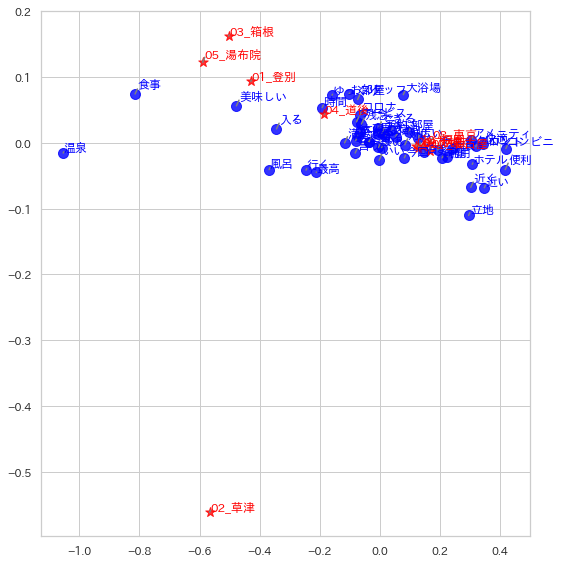

In [38]:
import random

plt.figure(figsize=(8,8))

tf = bag.toarray().sum(axis=0)
top_tf = tf.argsort()[:-50:-1]

# 表頭
plt.scatter(result_col.iloc[top_tf, 0], result_col.iloc[top_tf, 1], s=100, marker="o", c="blue", alpha=0.8)
for i in top_tf:
    r = random.random() * 0.01
    plt.text(result_col.iloc[i, 0]+r, result_col.iloc[i, 1]+r, result_col.index[i], c="blue")
    plt.plot([result_col.iloc[i, 0]+r, result_col.iloc[i, 0]], [result_col.iloc[i, 1]+r, result_col.iloc[i, 1]], c="gray")

# 表側
plt.scatter(result_row[0], result_row[1], s=100, marker="*", c="red", alpha=0.8)
for i in range(result_row.shape[0]):
    r = random.random() * 0.01
    plt.text(result_row.iloc[i, 0]+r, result_row.iloc[i, 1]+r, result_row.index[i], c="red")
    plt.plot([result_row.iloc[i, 0]+r, result_row.iloc[i, 0]], [result_row.iloc[i, 1]+r, result_row.iloc[i, 1]], c="gray")

plt.tight_layout()

#### 共起ネットワーク

In [39]:
n_top_words = 50
top_tf = tf.argsort()[:-n_top_words:-1]
top_tf

array([473, 435, 219, 300,  66, 150,  64, 269,  74, 339,  72, 489, 385,
        30, 273, 491, 120, 427,  94, 284, 424, 417, 146, 193, 255, 358,
       368, 299, 442, 276, 216, 460, 116, 129, 256,  13, 304, 176, 459,
       335, 108, 327,  92, 200, 112, 448,  98, 174, 383])

In [40]:
df_nodes = pd.DataFrame({'label': [feature_names[i] for i in top_tf], 'freq': tf[top_tf]})
df_nodes.head()

,label,freq
0,部屋,54709
1,良い,52693
2,利用,46858
3,思う,44684
4,とても,40270


In [41]:
from itertools import combinations
pairs = list(combinations(top_tf, 2))

min_col = 1000
left, right, freq = [], [], []
for p in pairs:
    df = df_count[(df_count.iloc[:, list(p)] > 0).all(axis=1)].shape[0]
    if df > min_col:
        left.append(feature_names[p[0]])    
        right.append(feature_names[p[1]])
        freq.append(df)

df_edges = pd.DataFrame({'left': left, 'right': right, 'freq': freq})
df_edges.head()

,left,right,freq
0,部屋,良い,15649
1,部屋,利用,12621
2,部屋,思う,14334
3,部屋,とても,11251
4,部屋,ホテル,10453


Louvain Modularity:  0.02303534065136808


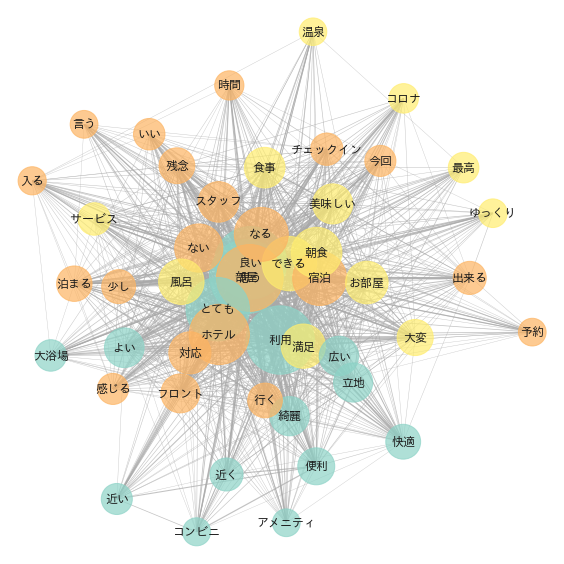

In [42]:
import networkx as nx
import community

G = nx.Graph()
G.add_nodes_from(df_nodes['label'])
G.add_weighted_edges_from(df_edges.values)

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.5)
part = community.best_partition(G)
print("Louvain Modularity: ", community.modularity(part, G))
size = float(len(set(part.values())))

# 孤立した node を削除
isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
for n in isolated:
    G.remove_node(n)

node_size = df_nodes['freq'] / 10
node_class = [part.get(node) for node in G.nodes()]
edge_width = [d["weight"] / 3000 for (u, v, d) in G.edges(data=True)]

nx.draw_networkx_nodes(G, pos, alpha=0.7, cmap=plt.get_cmap("Set3_r"), node_size=node_size, node_color=node_class)
nx.draw_networkx_edges(G, pos, alpha=0.7, edge_color="darkgrey", width=edge_width)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_weight="bold")

plt.axis('off')
plt.tight_layout()

In [43]:
(node_size.shape)

(49,)

### 3.3 カテゴリーごとの分析

#### 頻出語リスト

In [44]:
df_count_1 = df_count.iloc[df_all[df_all['カテゴリー'] == "A_レジャー"]['index']]
df_count_2 = df_count.iloc[df_all[df_all['カテゴリー'] == "B_ビジネス"]['index']]

dc_list = [df_count_1, df_count_2]

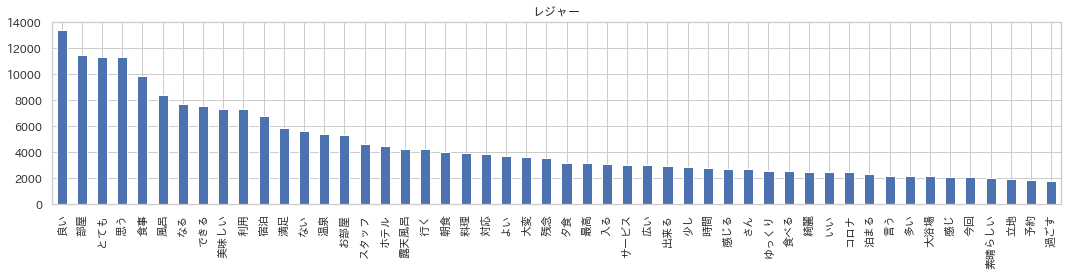

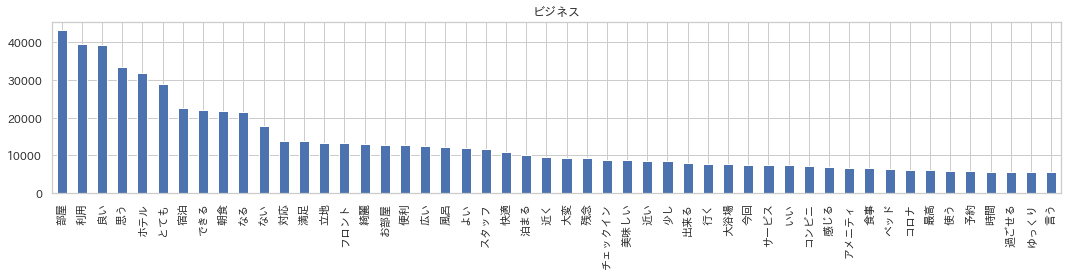

In [45]:
n_top_words = 50

for i, dc in enumerate(dc_list):
    dc.sum(axis=0).sort_values(ascending=False)[0:n_top_words].plot.bar(figsize=(15, 4), grid=True)
    plt.title(["レジャー", "ビジネス"][i])
    plt.tight_layout()
    plt.show()

#### トピックモデル

In [46]:
df_tfidf_1 = df_tfidf.iloc[df_all[df_all['カテゴリー'] == "A_レジャー"]['index']]
df_tfidf_2 = df_tfidf.iloc[df_all[df_all['カテゴリー'] == "B_ビジネス"]['index']]

dt_list = [df_tfidf_1, df_tfidf_2]

In [47]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

font_path = !find / -name "*.ttf" | grep -s "ipaexg.ttf" | head -n 1
font_path

['/usr/local/lib/python3.7/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf']

In [48]:
def plot_lda(tfidf, n_top_words):

    lda = LDA(max_iter=25, learning_method='batch', random_state=0, n_jobs=-1, n_components=4)
    lda.fit(tfidf)

    words = count.get_feature_names()

    fig = plt.figure(figsize=(15,8))

    for topic_idx, topic in enumerate(lda.components_):
        print("\nTopic #", topic_idx, ":")
        long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(long_string)

        ax = fig.add_subplot(2, 2, topic_idx + 1)
        wordcloud = WordCloud(font_path=font_path[0], background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
        wordcloud.generate(long_string)
        ax.imshow(wordcloud)
        ax.set_title('Topic '+str(topic_idx))

    plt.tight_layout()
    plt.show()

レジャー

Topic # 0 :
良い,風呂,部屋,露天風呂,食事,とても,温泉,よい,広い,お部屋,古い,残念,思う,満足,美味しい,綺麗,少し,最高,ない,大浴場,立地,なる,お湯,建物,湯畑,できる,入れる,感じる,感じ,入る,いい,サービス,快適,利用,貸切,大変,ホテル,値段,見える,宿泊,トイレ,景色,狭い,もう少し,便利,朝食,温度,付き,客室,寒い,清潔,料理,多い,きれい,アメニティ,cospa,近く,掃除,ベッド,布団,大きい,設備,清潔感,ゆっくり,行き届く,全体的,過ごせる,清掃,使う,新しい,嬉しい,気持ちよい,特に,ちょっと,臭い,気持ち良い,ちょうど,泊まる,ご飯,行く,楽しめる,おいしい,付く,つく,よく,シャワー,やすい,雰囲気,それ,すごい,かなり,コーヒー,施設,無料,欲しい,充実,近い,夕食,匂い,エアコン,子供,歩く,無い,出来る,もっと,寝る,十分,置く,言う,普通,洗面,自体,使える,不便,非常,見る,館内,キレイ,出る,少ない,あまり,眺め,小さい,種類,悪い,ドライヤー,あと,離れる,全体,食べる,サウナ,ゆったり,そこ,素晴らしい,テレビ,ルーム,バス,朝ごはん,駐車場,充分,浴槽,洗面所,いる,照明,しれる,問題,やや,すぐ,高い,洗い場,場所,いう,有馬線,旅館,凄い,暗い,ロビー,タオル,行ける,室内,廊下,スタッフ,ボリューム,落ち着く,冷蔵庫,浴室,加湿器,聞こえる,期待,シャンプー,ベット,ありがたい,安い,好き,広々,椅子,有る,過ごす,のんびり,その他,コンビニ,使用,眺望,距離,ドリンク,内装,機会,コンセント,そう,あり,部分,静か,2人,スペース,フロント,状態,眠れる,明るい,徒歩,飲む,時期,どれ,なかなか,写真,助かる,豪華,にくい,プラン,開ける,用意,飲み物,気持ち,タイプ,とっても,一つ,申し分,1つ,ラウンジ,品数,アクセス,髪の毛,いただける,選べる,印象,自分,価格,考える,改善,ユニットバス,スリッパ,遠い,家族,仕方,ドア,寝心地,ツイン,揃う,空く,一人,また,違う,しっかり,必要,機能,観光,ほぼ,1人,素泊まり,うるさい,たくさん,長い,泊まれる,対応,頂く,夜中,沢山,バイキング,びっくり,わかる,カーテン,ほしい,やはり,づらい,コンパクト,困る,女性,結構,

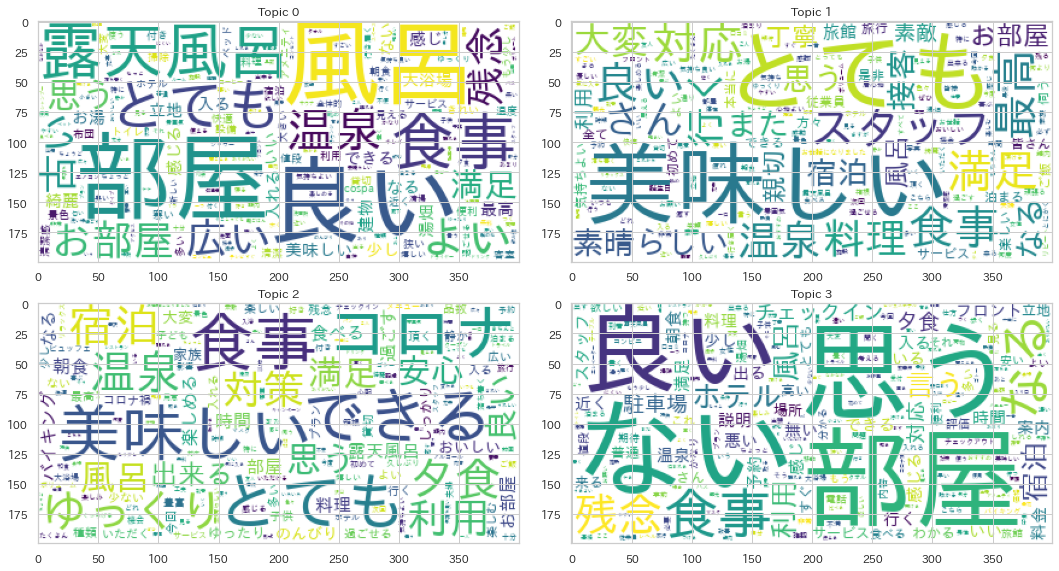

ビジネス

Topic # 0 :
朝食,良い,とても,快適,部屋,広い,美味しい,綺麗,よい,満足,利用,できる,過ごせる,風呂,お部屋,大浴場,ゆっくり,過ごす,きれい,充実,アメニティ,最高,ホテル,思う,宿泊,食べる,ベッド,無料,ゆったり,大変,バイキング,おいしい,サービス,出来る,清潔,嬉しい,付き,新しい,清潔感,種類,食事,泊まる,サウナ,やすい,静か,温泉,パン,豊富,景色,プラン,トイレ,朝ごはん,コーヒー,立地,ドリンク,リラックス,残念,落ち着く,くつろげる,見える,メニュー,楽しめる,機会,眺め,ビュッフェ,また,いただく,気持ちよい,いい,雰囲気,ラウンジ,大きい,寝心地,和食,すごい,のんびり,多い,広々,キレイ,弁当,とっても,選べる,品数,コロナ,ベット,居心地,なる,ご飯,夕食,少ない,もう少し,疲れ,眠れる,楽しい,十分,バス,入れる,設備,次回,コンパクト,豪華,ツイン,露天風呂,内容,初めて,気持ち良い,頂く,料理,ボリューム,是非,形式,特に,ありがたい,使う,気に入る,レストラン,癒す,うれしい,夜景,素敵,今回,時間,行く,眺望,好き,全体的,ない,家族,仕事,空間,どれ,影響,よく,もっと,楽しみ,つく,非常,館内,滞在,セット,テレビ,ロビー,室内,いただける,ぜひ,楽しむ,入る,付く,出張,有る,コロナ禍,提供,ちょうど,選ぶ,すべて,オープン,洗い場,寝る,感じ,とる,リピート,内装,シングル,選択,bathtab,値段,しっかり,チェックアウト,何より,今度,気分,全て,凄い,子供,用意,対策,少し,飲み物,たくさん,頂ける,揃う,飲む,全体,入浴,充分,機能,スペース,びっくり,期待,工夫,おすすめ,感じる,1人,一人,思える,一泊,明るい,シャンプー,いろいろ,アルコール,オススメ,施設,やはり,旅行,いく,時期,見る,いう,沢山,個人的,友人,1階,客室,環境,買う,まだ,色々,さらに,一番,デスク,評価,アクセス,驚く,旅館,通り,布団,普段,もちろん,お世話になりました,早い,助かる,どこ,会場,そう,喜ぶ,建物,有馬線,言う,加湿器,名古屋,翌日,取る,近い,大阪,含める,必要,安心,ビジネスホテル,予約,観光,以前,狭い,何度,早朝,素泊まり,フロア,使用,来る,かなり,いつも,箱根,さすが,

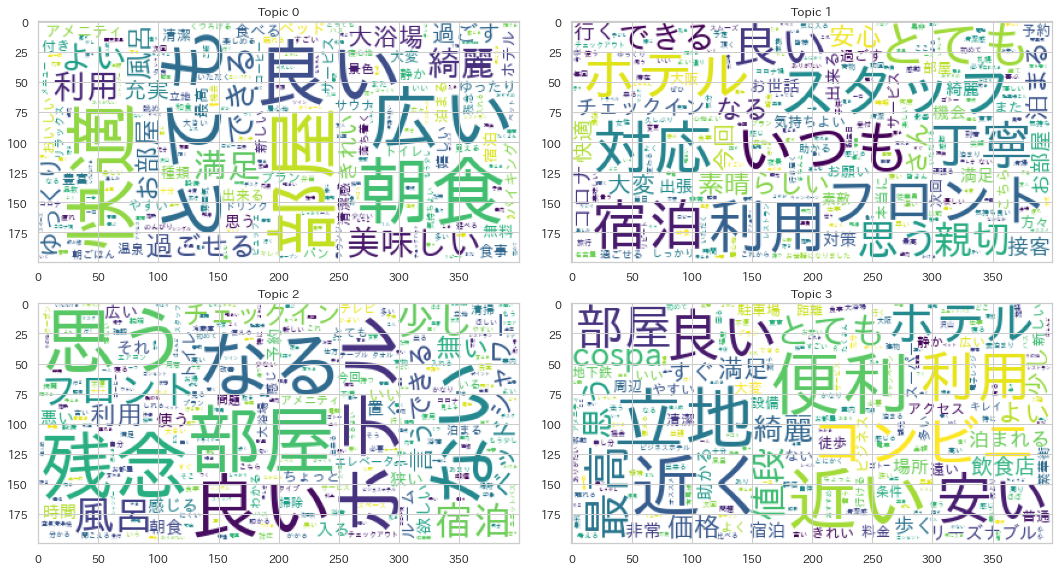

In [49]:
n_top_words = 500

for i, dt in enumerate(dt_list):
    print(["レジャー", "ビジネス"][i])
    plot_lda(dt, n_top_words)